In [266]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore' )

In [267]:
df = pd.read_excel('/content/flight_price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [268]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?
df.shape

(10683, 11)

<Axes: xlabel='Price', ylabel='Density'>

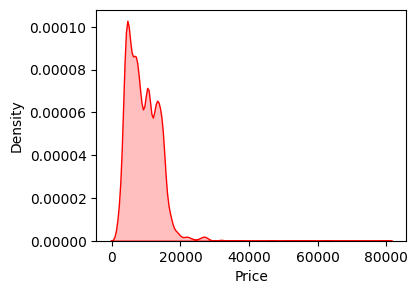

In [269]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.
plt.figure(figsize = (4,3))
sns.kdeplot(df['Price'],color  = 'r',fill  = True)

In [270]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

print(f"The price ranges from  {df['Price'].min()} to  {df['Price'].max()}")
print(f"The range is  {df['Price'].max() - df['Price'].min()}")



The price ranges from  1759 to  79512
The range is  77753


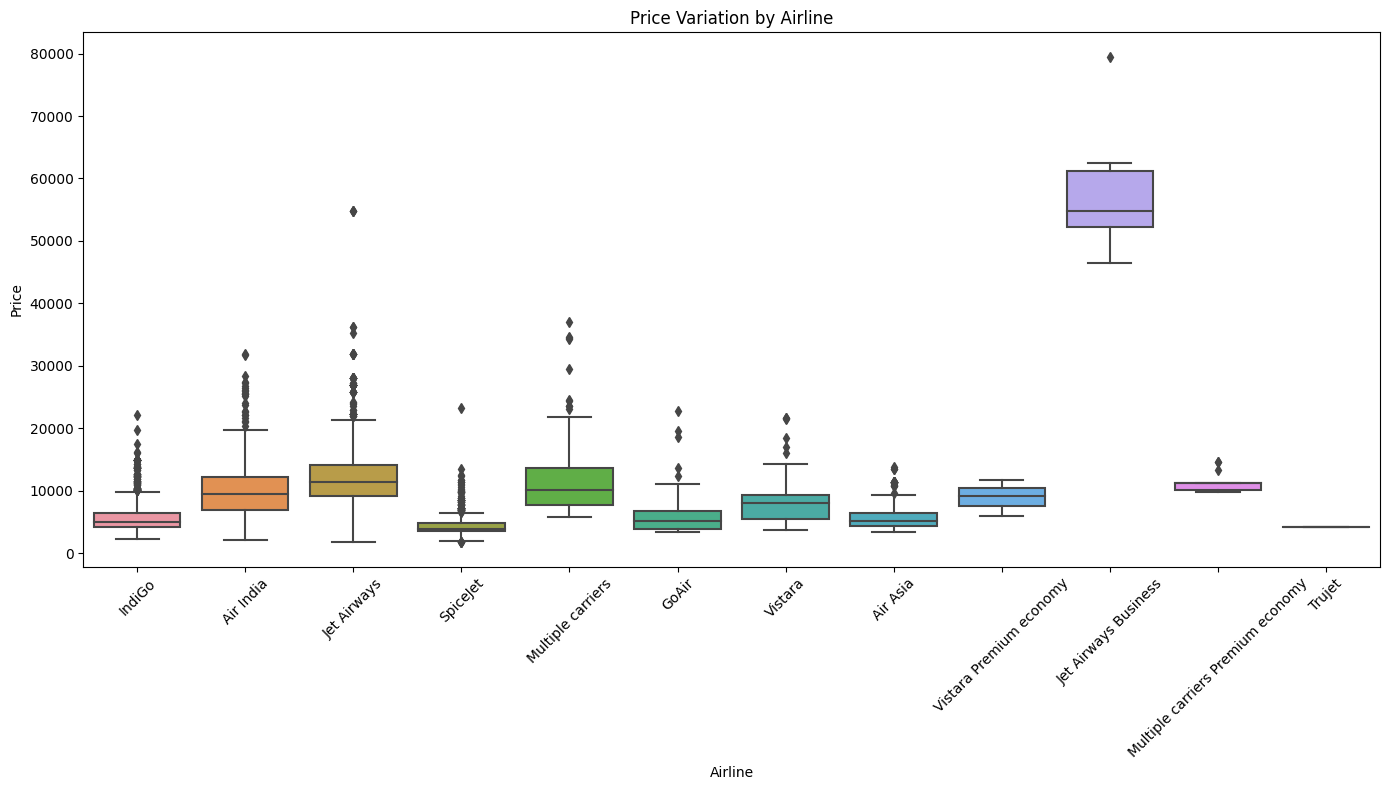

In [271]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.
plt.figure(figsize=(14, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Variation by Airline')
plt.tight_layout()
plt.show()

In [272]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
# they may impact your analysis.

columns_for_boxplot = [ 'Price' , 'Duration_hours', 'Duration_min']

num_columns = len(columns_for_boxplot)

num_rows = (num_columns - 1) // 2 + 1

print(num_columns,num_rows)

3 2


In [273]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df['Date'] = df['Date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)


df['Duration_hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] =  df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['Duration_min'].fillna(0,inplace = True)


df = df.drop(df[df['Duration_hours'] == '5m'].index)
df['Duration_min'] = df['Duration_min'].astype(int)
df['Duration_hours'] = df['Duration_hours'].astype(int)


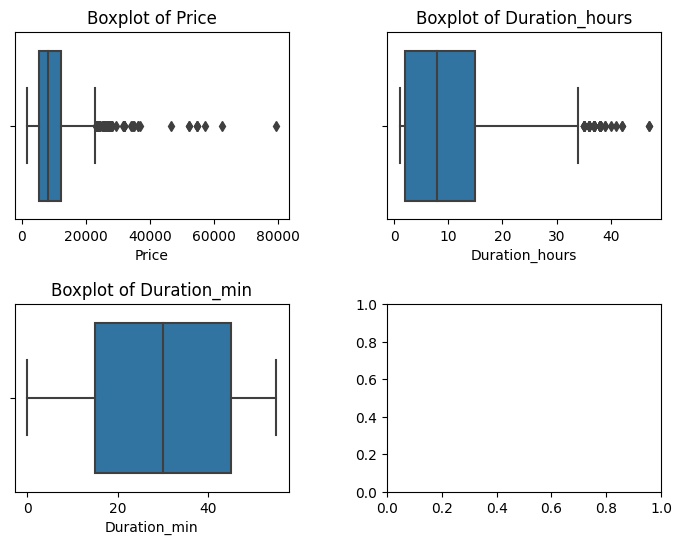

In [274]:
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 6))
fig.tight_layout(pad=4.0)

# Create boxplots using a for loop
for i, column in enumerate(columns_for_boxplot):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], data=df, x=column)
    axes[row, col].set_title(f'Boxplot of {column}')


plt.show()


<Axes: >

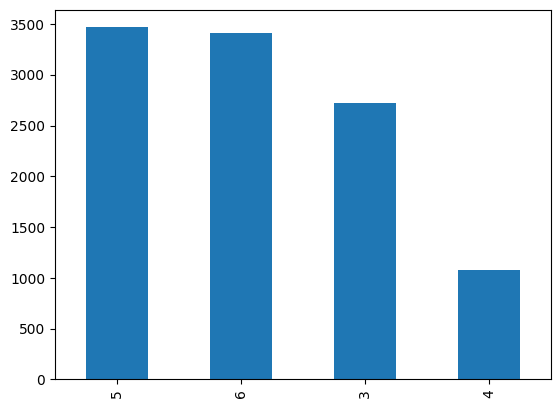

In [275]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
# to identify the peak travel season. What features would you analyze to identify the peak season, and how
# would you present your findings to your boss?
df['month'].value_counts().plot(kind = 'bar')

# Observation
**This graph shows that people only travel in march , april , may ,June  .**
People travel mostly in summer season

In [276]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?


# To identify trends in flight prices using the given Flight Price dataset, I would analyze the features that could potentially influence price variations. Here's an approach on the features to analyze and the visualizations to use for presenting findings to the team:

# **Features to Analyze:**
# 1. **Date, Month, and Year:** Analyze how flight prices vary over different dates, months, and years to identify any seasonal trends.
# 2. **Airline:** Explore price differences among different airlines. Certain airlines might consistently offer higher or lower prices.
# 3. **Source and Destination:** Investigate how prices differ based on the source and destination locations.
# 4. **Total Stops:** Check if flight prices increase with the number of stops, as flights with fewer stops might be more expensive.
# 5. **Departure and Arrival Times:** Examine whether flight prices vary based on departure and arrival times, as certain times of the day could be more expensive.
# 6. **Duration:** Analyze the impact of flight duration on prices. Longer flights might have higher prices.

# **Visualizations to Use:**
# 1. **Line Plot by Date, Month, and Year:**
#    - Create line plots showing how average prices change over time. Each plot can focus on a specific aspect, such as day, month, or year.
#    - X-axis: Date, Month, or Year
#    - Y-axis: Average Price
#    - Multiple lines for different years or months can be plotted for comparison.

# 2. **Box Plots by Airline:**
#    - Use box plots to visualize the distribution of prices for each airline.
#    - X-axis: Airline
#    - Y-axis: Price
#    - This visualization can help identify airlines with consistently higher or lower prices.

# 3. **Bar Plots for Source and Destination:**
#    - Create bar plots to compare average prices based on the source and destination locations.
#    - X-axis: Source or Destination
#    - Y-axis: Average Price
#    - Separate bars can represent different source or destination locations.

# 4. **Bar Plots for Total Stops:**
#    - Visualize how flight prices change based on the number of stops using bar plots.
#    - X-axis: Total Stops
#    - Y-axis: Average Price

# 5. **Heatmap for Departure and Arrival Times:**
#    - Create a heatmap to show how prices vary across different departure and arrival times.
#    - X-axis: Departure Hour
#    - Y-axis: Arrival Hour
#    - Color-coding can represent price ranges.

# 6. **Scatter Plot for Duration vs. Price:**
#    - Use scatter plots to examine the relationship between flight duration and price.
#    - X-axis: Duration (hours)
#    - Y-axis: Price
#    - Each point represents a flight.

# 7. **Time Series Decomposition:**
#    - Perform time series decomposition to identify seasonal, trend, and residual components in flight prices over time.
#    - This can help reveal underlying patterns in price fluctuations.

# 8. **Correlation Heatmap:**
#    - Create a correlation heatmap to visualize the relationships between numerical features (e.g., Price, Total_Stops, Departure_hour, Duration_hours, etc.).
#    - This can help identify which features are most strongly correlated with price.



Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In our analysis of the Flight Price dataset, we focused on understanding the factors that have an impact on flight prices. By examining the correlation matrix, we were able to identify several features that show significant relationships with the flight prices. Let's discuss the key findings:

Total Stops (0.604):

The number of stops in a flight shows the highest positive correlation with flight prices. As the number of stops increases, the flight prices tend to rise.
This suggests that non-direct flights or flights with layovers generally have higher prices compared to direct flights.
Duration (0.509 for Duration_hours, -0.125 for Duration_min):

The total duration of the flight, especially in terms of hours, is positively correlated with flight prices. Longer flights are associated with higher prices.
Interestingly, the correlation with the duration in minutes is negative, indicating that shorter flight durations lead to higher prices.
Month (-0.309):

The month of travel displays a negative correlation with flight prices. As the month number increases, prices tend to decrease.
This suggests that certain months might be more cost-effective for travelers.
Airline (0.067):



In [277]:
df.drop('year',axis = 1,inplace = True)

In [278]:
data = {
    'non-stop' : 0,
    '1 stop' :  1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4,
}

df['Total_Stops'] = df['Total_Stops'].map(data)
df.corr()

,Total_Stops,Price,Date,month,Duration_hours,Duration_min
Total_Stops,1.000000,0.603782,-0.009308,0.054636,0.740268,-0.136513
Price,0.603782,1.000000,-0.153619,-0.103431,0.508985,-0.124673
Date,-0.009308,-0.153619,1.000000,-0.038505,-0.022283,-0.009112
month,0.054636,-0.103431,-0.038505,1.000000,0.016012,-0.041076
Duration_hours,0.740268,0.508985,-0.022283,0.016012,1.000000,-0.126530
Duration_min,-0.136513,-0.124673,-0.009112,-0.041076,-0.126530,1.000000


In [279]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
# the dataset have?
df1 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.shape

(10841, 13)

<Axes: xlabel='Category', ylabel='Rating'>

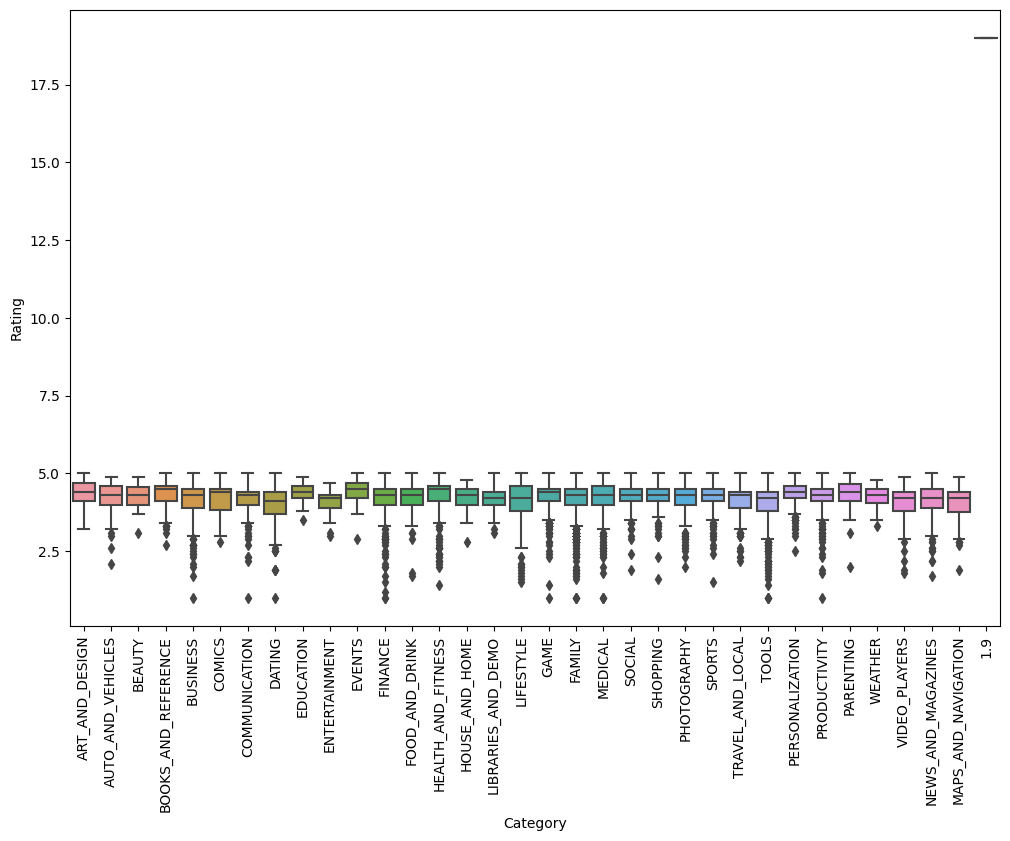

In [280]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
# app categories.
plt.figure(figsize = (12,8))
plt.xticks(rotation  = 90)
sns.boxplot(data = df1 , x = 'Category',y = 'Rating')

In [281]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
# impact your analysis.
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: xlabel='Size', ylabel='Rating'>

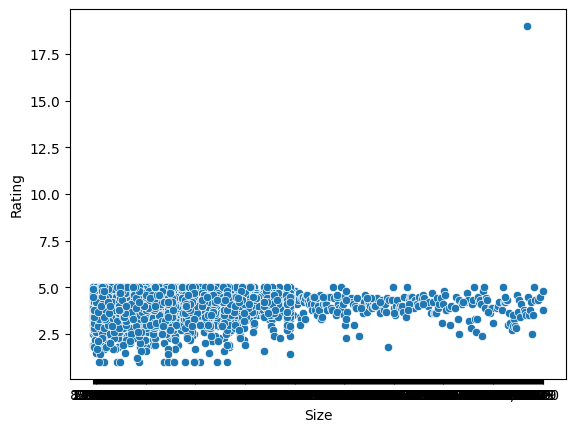

In [282]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
# the relationship.
df1['Size']=df1['Size'].str.replace('M','000')
df1['Size']=df1['Size'].str.replace('k','')
df1['Size']=df1['Size'].replace('Varies with device',np.nan)
df1[df1['Size'].isnull()]
sns.scatterplot(data = df1 , y = 'Rating' , x = 'Size')

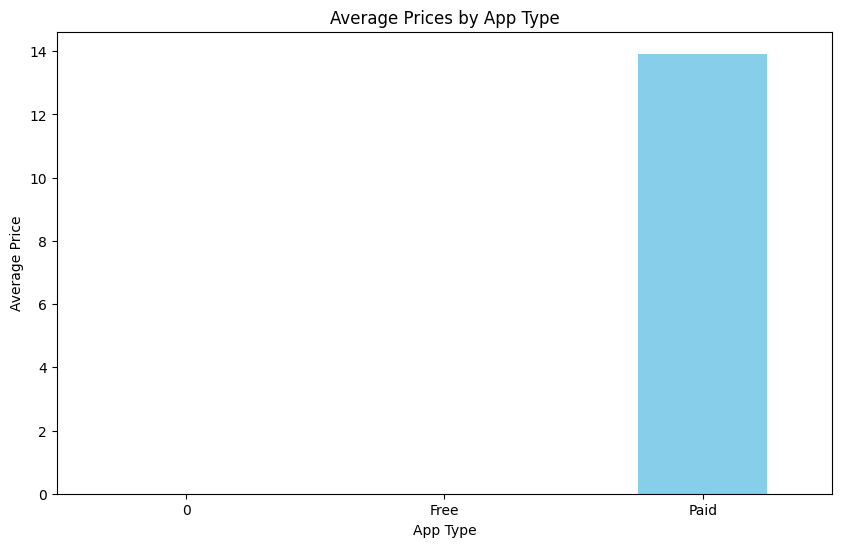

In [283]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

col_clean = ['Price','Installs']
cleaner = ['$','+',',']

for items in cleaner :
    for i in col_clean :
        df1[i] = df1[i].str.replace(items , '')

df1['Price'] = df1['Price'].replace('Everyone',0)
df1['Price'] = df1['Price'].astype(float)
app_type_prices = df1[['Type', 'Price']]


average_prices_by_type = app_type_prices.groupby('Type')['Price'].mean()


plt.figure(figsize=(10, 6))
average_prices_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


In [284]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.


app_installs = df1[['App', 'Installs']]


install_frequencies = app_installs['Installs'].value_counts()

top_10_apps = install_frequencies.head(10)

top_10_apps


1000000     1579
10000000    1252
100000      1169
10000       1054
1000         907
5000000      752
100          719
500000       539
50000        479
5000         477
Name: Installs, dtype: int64

In [285]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
# Google Playstore dataset to identify the most popular app categories. How would you approach this
# task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories on the Google Play Store, you can follow these steps:

Data Exploration: Begin by exploring the dataset to understand its structure, available features, and the type of data it contains. This will help you identify relevant columns for your analysis.

Data Cleaning: Clean the data by handling missing values, removing duplicates, and converting relevant columns to appropriate data types.

Data Analysis: To recommend the most popular app categories, you can analyze the following features:

a. Installs: Look at the number of installs for each app category. Apps with higher numbers of installs are likely to be more popular.

b. Ratings: Analyze the average ratings for each app category. Higher-rated apps tend to attract more users.

c. Reviews: Consider the total number of reviews for each app category. A higher number of reviews might indicate higher user engagement.


Visualizations: Create visualizations such as bar charts, scatter plots, and histograms to represent the distribution of installs, ratings, and reviews across different app categories. This will make it easier to identify popular categories.



In [286]:
# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
# most successful app developers. What features would you analyze to make recommendations to the
# company, and what data visualizations would you use to present your findings?



Total Installs: Calculate the total number of installs across all apps developed by each developer. This can indicate the overall popularity and reach of their apps.

Average Ratings: Calculate the average ratings of apps for each developer. Higher average ratings might indicate better app quality and user satisfaction.

Total Reviews: Analyze the total number of reviews received by all apps of each developer. A higher number of reviews could suggest higher user engagement.

App Categories: Explore the distribution of app categories that each developer focuses on. Some developers might specialize in certain niches that are more successful.

App Updates: Analyze the frequency of app updates for each developer. Regular updates might indicate active development and responsiveness to user feedback.

In [287]:
# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
# launch a new app. What features would you analyze to make recommendations to the company, and
# what data visualizations would you use to present your findings?

I would analyze last updated , current ver ,andorid ver beacause it tell best time to launch the app as it will tell when the apps will become outdated

I Would also analze category and installs to know which category will be the best to app to use


I would use scatterplot ,heatmap to see corrlation

I would use barplot , to see which category has most installs
and some other visulization